In [2]:
pip install citipy

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time
import json
import scipy.stats as st

#import api key from configs.py file
from configs import api_key

#city data based on lat. and long.
from citipy import citipy

#output file (csv)
output_data_file = "output_data/cities.csv"

#Range of latitudes and logitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

#np.random.seed(1)
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

650

In [5]:
#set up dataframe and create empty columns for the data to be entered into
cities_df = pd.DataFrame({"City": cities})
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""

#base url ready for the city name to be added to the end
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={api_key}&q='

#starting data retrieval
print("Beginning Data Retrieval")
print("-----------------------------")
#go through cities_df by city name and start entering in the info from the API
for index, row in cities_df.iterrows():
    #get city from df 
    city_name = row["City"]
    #assemble url and make api call
    response = requests.get(base_url + city_name).json()
    
    #try to fill in the df, else print skipping
    try:
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Lng'] = response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
        print(f'Processing record {index} | {city_name}')
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        #delete that row from df
        cities_df = cities_df.drop([index])

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

#convert Max temp from Kelvin to Fahrenheit and Wind Speed from m/s to mph
cities_df["Max Temp"] = cities_df["Max Temp"] * 1.8 - 459.67
cities_df["Wind Speed"] = cities_df["Wind Speed"] / 0.44704

#delete rows with NAs
cities_df = cities_df.dropna()

Beginning Data Retrieval
-----------------------------
Processing record 0 | vaini
Processing record 1 | plettenberg bay
Processing record 2 | lakhtar
Processing record 3 | new norfolk
Processing record 4 | hithadhoo
Processing record 5 | ushuaia
Processing record 6 | nyuksenitsa
Processing record 7 | port-cartier
Processing record 8 | kapaa
Processing record 9 | lebu
Processing record 10 | cherskiy
Processing record 11 | mataura
Processing record 12 | bangangte
Processing record 13 | bambous virieux
Processing record 14 | hambantota
Processing record 15 | bluff
Processing record 16 | meulaboh
Processing record 17 | zhigansk
Processing record 18 | georgetown
Processing record 19 | provideniya
Processing record 20 | strezhevoy
Processing record 21 | darnah
Processing record 22 | hobart
Processing record 23 | camacha
Processing record 24 | tasiilaq
Processing record 25 | qaanaaq
Processing record 26 | hilo
Processing record 27 | sao joao da barra
Processing record 28 | natal
Processing r

City not found. Skipping...
Processing record 253 | peniche
Processing record 254 | pacific grove
Processing record 255 | kruisfontein
Processing record 256 | mangan
Processing record 257 | chernyshevskiy
Processing record 258 | barstow
Processing record 259 | labrea
Processing record 260 | porvoo
Processing record 261 | thompson
City not found. Skipping...
Processing record 263 | manicore
Processing record 264 | catamarca
Processing record 265 | weligama
Processing record 266 | carbonear
Processing record 267 | bathsheba
Processing record 268 | kalemie
Processing record 269 | mulege
Processing record 270 | yacuiba
Processing record 271 | pingliang
Processing record 272 | airai
Processing record 273 | alamosa
Processing record 274 | caravelas
Processing record 275 | kamaishi
Processing record 276 | dunedin
Processing record 277 | seydi
Processing record 278 | oskarshamn
Processing record 279 | manali
Processing record 280 | alekseyevsk
Processing record 281 | erzin
Processing record 28

Processing record 506 | marsh harbour
Processing record 507 | hofn
Processing record 508 | vila do maio
Processing record 509 | praia
Processing record 510 | oudtshoorn
City not found. Skipping...
Processing record 512 | klaksvik
Processing record 513 | komatipoort
Processing record 514 | san patricio
Processing record 515 | ukiah
Processing record 516 | olgiate comasco
Processing record 517 | shakawe
Processing record 518 | ojinaga
Processing record 519 | torit
City not found. Skipping...
Processing record 521 | constitucion
Processing record 522 | vostok
Processing record 523 | tres lagoas
Processing record 524 | nicoya
Processing record 525 | maliq
Processing record 526 | wamba
Processing record 527 | jalu
Processing record 528 | itinga
Processing record 529 | aginskoye
Processing record 530 | xinzhou
Processing record 531 | dir
Processing record 532 | saldanha
Processing record 533 | acarau
Processing record 534 | la ronge
Processing record 535 | vanersborg
Processing record 536 | 

In [6]:
#export data to csv
cities_df.to_csv('../output_data/cities_df.csv')

#display number of values for each column in df
cities_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [7]:
#display the dataframe
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2,-175.2,71.6,88,20,5.81603,TO,1593094895
1,plettenberg bay,-34.05,23.37,75.416,34,0,6.48712,ZA,1593094895
2,lakhtar,22.85,71.78,94.442,47,100,6.15157,IN,1593094895
3,new norfolk,-42.78,147.06,46.004,79,0,5.01074,AU,1593094895
4,hithadhoo,-0.6,73.08,84.668,72,83,10.3123,MV,1593094652


In [8]:
#inspect df and determine number of cities with over 100% humidity 
low_humidity_df = cities_df[cities_df.Humidity <= 100]
print(f'The number of cities with over 100% humidity is {len(cities_df) - len(low_humidity_df)}.')

The number of cities with over 100% humidity is 0.


In [9]:
#  Get the indices of cities that have humidity over 100%.
over_100_indexes = cities_df[cities_df.Humidity > 100].index
over_100_indexes

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data= cities_df
for x in over_100_indexes:
    clean_city_data = cities_df.drop([x])

clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2,-175.2,71.6,88,20,5.81603,TO,1593094895
1,plettenberg bay,-34.05,23.37,75.416,34,0,6.48712,ZA,1593094895
2,lakhtar,22.85,71.78,94.442,47,100,6.15157,IN,1593094895
3,new norfolk,-42.78,147.06,46.004,79,0,5.01074,AU,1593094895
4,hithadhoo,-0.6,73.08,84.668,72,83,10.3123,MV,1593094652


In [11]:
# Extract relevant fields from the data frame
lat = clean_city_data.Lat
max_temp = clean_city_data["Max Temp"]
humid = clean_city_data.Humidity
cloud = clean_city_data.Cloudiness
wind = clean_city_data['Wind Speed']

# Export the City_Data into a csv
clean_city_data.to_csv('../output_data/clean_city_data.csv', index = False)

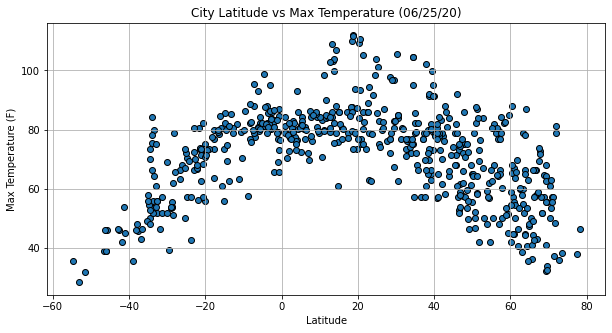

In [12]:
#Latitude vs Temperature Plot

#save today's date in the today variable
today = pd.to_datetime('today').strftime("%m/%d/%y")
fig = plt.figure(figsize = (10,5))

#calling scatter plot
plt.scatter(lat, max_temp, edgecolors = "black")
plt.title(f'City Latitude vs Max Temperature ({today})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#saving figure in the output_data directory
fig.savefig('../output_data/lati_vs_temp.png')
plt.show()

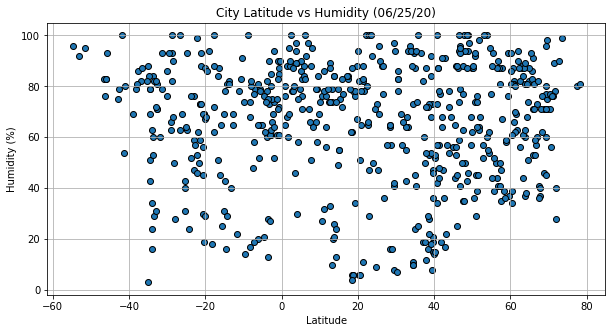

In [13]:
#Latitude vs Humidity Plot

fig = plt.figure(figsize = (10,5))

#call scatter plot
plt.scatter(lat, humid, edgecolors = "black")
plt.title(f'City Latitude vs Humidity ({today})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#saving figure to the output_data directory
fig.savefig('../output_data/lat_vs_humid.png')
plt.show()

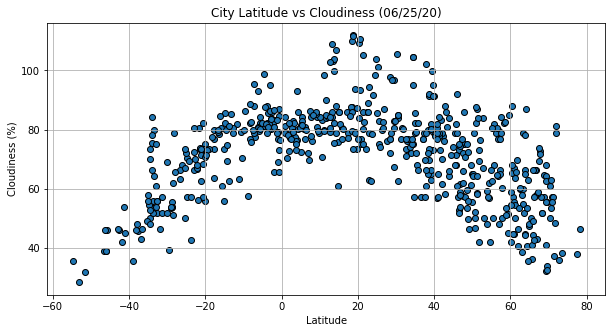

In [14]:
#Latitude vs Cloudiness Plot

fig = plt.figure(figsize = (10,5))

#calling scatter plot
plt.scatter(lat, max_temp, edgecolors = "black")
plt.title(f'City Latitude vs Cloudiness ({today})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#saving file to the output_data directory
fig.savefig('../output_data/lat_vs_cloudiness.png')
plt.show()

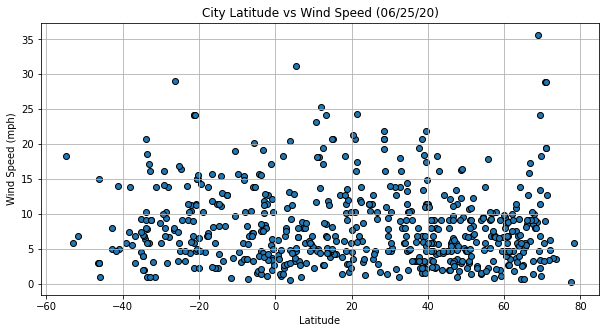

In [15]:
#Latitude vs Wind Speed Plot

fig = plt.figure(figsize = (10,5))

#calling scatter plot
plt.scatter(lat, wind, edgecolors = "black")
plt.title(f'City Latitude vs Wind Speed ({today})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

#saving plot to the output_data directory
fig.savefig('../output_data/lat_vs_wind_speed.png')
plt.show()

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots

#input is 2 lists and returns regress_values, the line equation of best fit, and the r correlation
def lin_regress(list_x, list_y):
    slope, int, r, p, st_err = st.linregress(list_x, list_y)
    regress_values = slope*list_x + int
    line_eq = f'y = {round(slope, 2)}x + {round(int,2)}'
    return regress_values, line_eq, r

In [17]:
# Create Northern and Southern Hemisphere DataFrames

north_hem = clean_city_data[clean_city_data["Lat"] >= 0]
south_hem = clean_city_data[clean_city_data["Lat"] < 0]

# All Northern Hemisphere Plots

In [18]:
#Preparing data for all the northern hemisphere plots

lat = north_hem.Lat.astype(float)
max_temp = north_hem["Max Temp"].astype(float)
humid = north_hem.Humidity.astype(float)
cloud = north_hem.Cloudiness.astype(float)
wind = north_hem['Wind Speed'].astype(float)

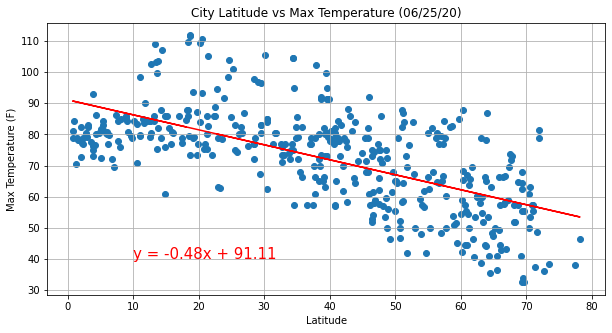

The r-squared is: 0.40736058328037583


In [19]:
#Northern Hemisphere - Max Temp vs Latitude Linear Regression

#calling the linear regression function and saving the 3 outputs(regress_values, line_eq, and r) to the regress variable
regress = lin_regress(lat, max_temp)

fig = plt.figure(figsize = (10,5))

#calling the scatter plot
plt.scatter(lat, max_temp)
plt.title(f'City Latitude vs Max Temperature ({today})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#plots the linear regression line
plt.plot(lat, regress[0], color = "red")
#adds the linear regression equation to the plot
plt.annotate(regress[1], (10,40), fontsize = 15, color = "red" )

#saves the file to the output_data directory
fig.savefig('../output_data/north_lat_vs_temp.png')
plt.show()

#prints the r-squared value
print(f'The r-squared is: {pow(regress[2], 2)}')

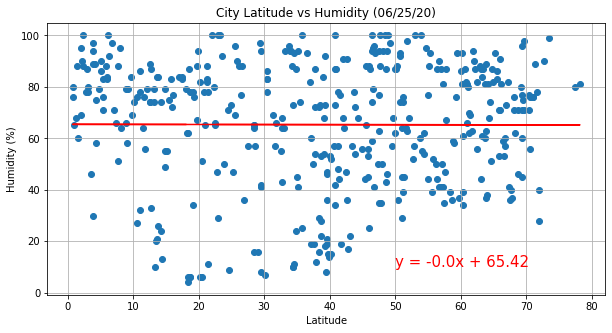

The r-squared is: 4.279767607972819e-06


In [20]:
#Northern Hemisphere - Humidity (%) vs Latitude Linear Regression

#calling the linear regression function and saving the 3 outputs(regress_values, line_eq, and r) to the regress variable
regress = lin_regress(lat, humid)

fig = plt.figure(figsize = (10,5))

#call scatter plot
plt.scatter(lat, humid)
plt.title(f'City Latitude vs Humidity ({today})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#plots the linear regression line
plt.plot(lat, regress[0], color = "red")
#adds the linear regression equation to the plot
plt.annotate(regress[1], (50,10), fontsize = 15, color = "red" )

#saving figure to the output_data directory
fig.savefig('../output_data/north_lat_vs_humid.png')
plt.show()

#prints the r-squared value
print(f'The r-squared is: {pow(regress[2], 2)}')

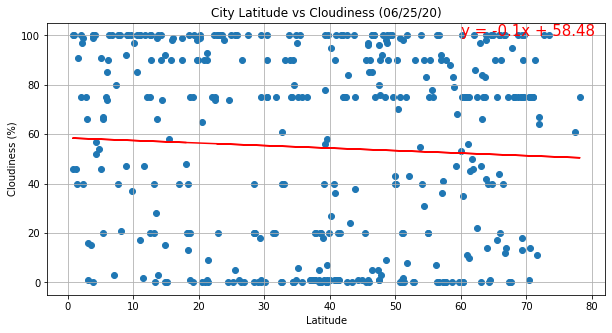

The r-squared is: 0.002945108917430221


In [21]:
#Northern Hemisphere - Cloudiness (%) vs Latitude Linear Regression

#calling the linear regression function and saving the 3 outputs(regress_values, line_eq, and r) to the regress variable
regress = lin_regress(lat, cloud)

fig = plt.figure(figsize = (10,5))

#calling scatter plot
plt.scatter(lat, cloud)
plt.title(f'City Latitude vs Cloudiness ({today})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#plots the linear regression line
plt.plot(lat, regress[0], color = "red")
#adds the linear regression equation to the plot
plt.annotate(regress[1], (60,100), fontsize = 15, color = "red" )

#saving file to the output_data directory
fig.savefig('../output_data/north_lat_vs_cloudiness.png')
plt.show()

#prints the r-squared value
print(f'The r-squared is: {pow(regress[2], 2)}')

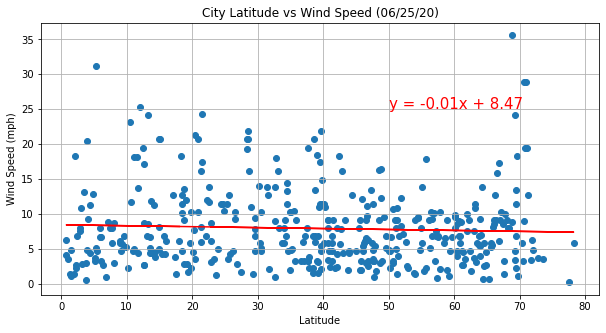

The r-squared is: 0.0024791423491533388


In [22]:
#Northern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression

#calling the linear regression function and saving the 3 outputs(regress_values, line_eq, and r) to the regress variable
regress = lin_regress(lat, wind)

fig = plt.figure(figsize = (10,5))

#calling scatter plot
plt.scatter(lat, wind)
plt.title(f'City Latitude vs Wind Speed ({today})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

#plots the linear regression line
plt.plot(lat, regress[0], color = "red")
#adds the linear regression equation to the plot
plt.annotate(regress[1], (50,25), fontsize = 15, color = "red" )

#saving plot to the output_data directory
fig.savefig('../output_data/north_lat_vs_wind_speed.png')
plt.show()

#prints the r-squared value
print(f'The r-squared is: {pow(regress[2], 2)}')

# All Southern Hemisphere Plots

In [23]:
#Preparing data for all the northern hemisphere plots

lat = south_hem.Lat.astype(float)
max_temp = south_hem["Max Temp"].astype(float)
humid = south_hem.Humidity.astype(float)
cloud = south_hem.Cloudiness.astype(float)
wind = south_hem['Wind Speed'].astype(float)

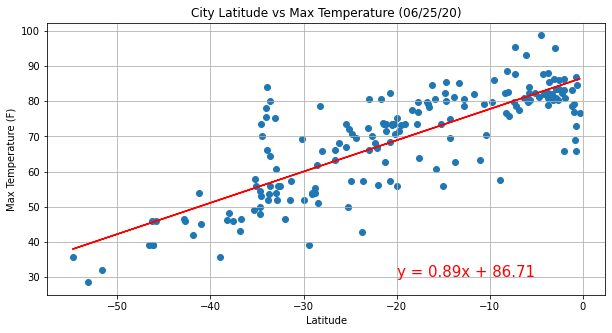

The r-squared is: 0.6590660249567407


In [24]:
#Southern Hemisphere - Max Temp vs Latitude Linear Regression

#calling the linear regression function and saving the 3 outputs(regress_values, line_eq, and r) to the regress variable
regress = lin_regress(lat, max_temp)

fig = plt.figure(figsize = (10,5))

#calling the scatter plot
plt.scatter(lat, max_temp)
plt.title(f'City Latitude vs Max Temperature ({today})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#plots the linear regression line
plt.plot(lat, regress[0], color = "red")
#adds the linear regression equation to the plot
plt.annotate(regress[1], (-20,30), fontsize = 15, color = "red" )

#saves the file to the output_data directory
fig.savefig('../output_data/south_lat_vs_temp.png')
plt.show()

#prints the r-squared value
print(f'The r-squared is: {pow(regress[2], 2)}')

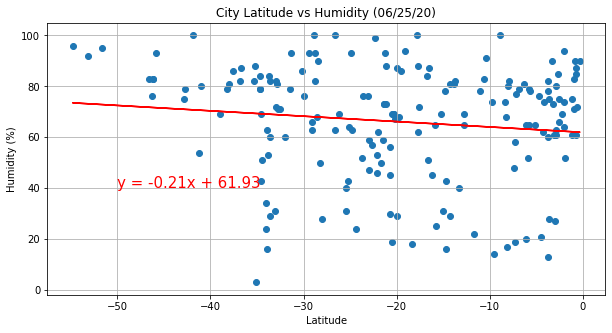

The r-squared is: 0.016167533237043064


In [25]:
#Southern Hemisphere - Humidity (%) vs Latitude Linear Regression

#calling the linear regression function and saving the 3 outputs(regress_values, line_eq, and r) to the regress variable
regress = lin_regress(lat, humid)

fig = plt.figure(figsize = (10,5))

#call scatter plot
plt.scatter(lat, humid)
plt.title(f'City Latitude vs Humidity ({today})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#plots the linear regression line
plt.plot(lat, regress[0], color = "red")
#adds the linear regression equation to the plot
plt.annotate(regress[1], (-50,40), fontsize = 15, color = "red" )

#saving figure to the output_data directory
fig.savefig('../output_data/south_lat_vs_humid.png')
plt.show()

#prints the r-squared value
print(f'The r-squared is: {pow(regress[2], 2)}')

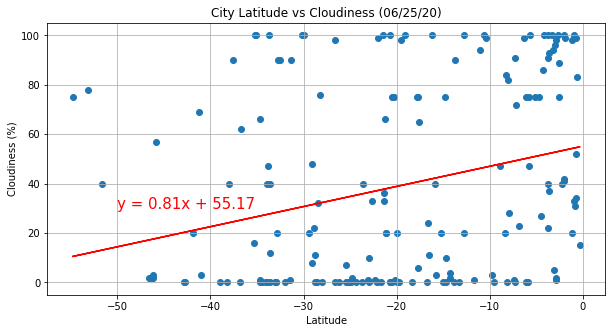

The r-squared is: 0.07790948882302112


In [26]:
#Southern Hemisphere - Cloudiness (%) vs Latitude Linear Regression

#calling the linear regression function and saving the 3 outputs(regress_values, line_eq, and r) to the regress variable
regress = lin_regress(lat, cloud)

fig = plt.figure(figsize = (10,5))

#calling scatter plot
plt.scatter(lat, cloud)
plt.title(f'City Latitude vs Cloudiness ({today})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#plots the linear regression line
plt.plot(lat, regress[0], color = "red")
#adds the linear regression equation to the plot
plt.annotate(regress[1], (-50,30), fontsize = 15, color = "red" )

#saving file to the output_data directory
fig.savefig('../output_data/south_lat_vs_cloudiness.png')
plt.show()

#prints the r-squared value
print(f'The r-squared is: {pow(regress[2], 2)}')

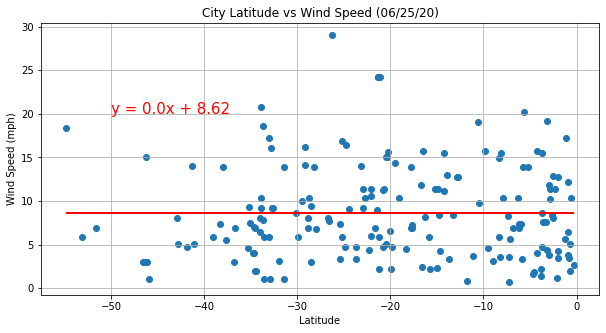

The r-squared is: 8.16848953662939e-07


In [27]:
#Southern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression

#calling the linear regression function and saving the 3 outputs(regress_values, line_eq, and r) to the regress variable
regress = lin_regress(lat, wind)

fig = plt.figure(figsize = (10,5))

#calling scatter plot
plt.scatter(lat, wind)
plt.title(f'City Latitude vs Wind Speed ({today})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

#plots the linear regression line
plt.plot(lat, regress[0], color = "red")
#adds the linear regression equation to the plot
plt.annotate(regress[1], (-50,20), fontsize = 15, color = "red" )

#saving plot to the output_data directory
fig.savefig('../output_data/south_lat_vs_wind_speed.png')
plt.show()

#prints the r-squared value
print(f'The r-squared is: {pow(regress[2], 2)}')

In [31]:
#Data Analysis
print("Data Analysis")
print("Trend 1: In the southern hemisphere, the cloudiness increases as the latitude approaches the equator.")
print("Trend 2: In the southern hemisphere, the maximum temperature increases as the latitude approaches the equator.")
print("Trend 3: In the northern hemisphere, the maxiumum temperature decreases as the latitude retreats from the equator.")

Data Analysis
Trend 1: In the southern hemisphere, the cloudiness increases as the latitude approaches the equator.
Trend 2: In the southern hemisphere, the maximum temperature increases as the latitude approaches the equator.
Trend 3: In the northern hemisphere, the maxiumum temperature decreases as the latitude retreats from the equator.
